In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [17]:
df=pd.read_csv(r"/Users/sabhyalokhande/Desktop/DMV New/Air_Quality_Index.csv")
df

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49000,NaN,23-03-05,Chandigarh,Chandigarh,NaN,Residential and others,6.0,15.0,47.0,125.0,Punjab Eng College,NaN,2005-03-23
49001,NaN,25-03-05,Chandigarh,Chandigarh,NaN,Residential and others,NaN,12.0,54.0,161.0,Punjab Eng College,NaN,2005-03-25
49002,NaN,28-03-05,Chandigarh,Chandigarh,NaN,Residential and others,NaN,10.0,116.0,196.0,Punjab Eng College,NaN,2005-03-28
49003,NaN,30-03-05,Chandigarh,Chandigarh,NaN,Residential and others,NaN,9.0,38.0,154.0,Punjab Eng College,NaN,2005-03-30


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49005 entries, 0 to 49004
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   stn_code                     33241 non-null  float64
 1   sampling_date                49005 non-null  object 
 2   state                        49005 non-null  object 
 3   location                     49005 non-null  object 
 4   agency                       32650 non-null  object 
 5   type                         48011 non-null  object 
 6   so2                          47692 non-null  float64
 7   no2                          48147 non-null  float64
 8   rspm                         46309 non-null  float64
 9   spm                          20346 non-null  float64
 10  location_monitoring_station  46468 non-null  object 
 11  pm2_5                        0 non-null      float64
 12  date                         49005 non-null  object 
dtypes: float64(6), o

In [19]:
df.isnull().sum()

stn_code                       15764
sampling_date                      0
state                              0
location                           0
agency                         16355
type                             994
so2                             1313
no2                              858
rspm                            2696
spm                            28659
location_monitoring_station     2537
pm2_5                          49005
date                               0
dtype: int64

In [20]:
df['date'] = pd.to_datetime(df['date']) # String to object “1990-02-01” - “1990-02-01”
df['year']=df['date'].dt.year # new columns
df = df.sort_values('date') 

In [21]:
df.dtypes

stn_code                              float64
sampling_date                          object
state                                  object
location                               object
agency                                 object
type                                   object
so2                                   float64
no2                                   float64
rspm                                  float64
spm                                   float64
location_monitoring_station            object
pm2_5                                 float64
date                           datetime64[ns]
year                                    int32
dtype: object

In [22]:
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']

# --- Fill categorical missing values with "Unknown" ---
for col in cat_cols:
    df[col] = df[col].fillna("Unknown")

# --- Fill numerical missing values with median ---
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Check remaining nulls
print(df.isnull().sum())

stn_code                       15764
sampling_date                      0
state                              0
location                           0
agency                             0
type                               0
so2                                0
no2                                0
rspm                               0
spm                                0
location_monitoring_station        0
pm2_5                          49005
date                               0
year                               0
dtype: int64


In [23]:
df.drop(columns='sampling_date',axis=1,inplace=True)
print("Before Drop Duplicates:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("After Drop Duplicates:", df.duplicated().sum())

Before Drop Duplicates: 230
After Drop Duplicates: 0


In [24]:
pollutants = ['so2', 'no2', 'rspm', 'spm']
daily_data = df.groupby('date')[pollutants].mean()
daily_data

,so2,no2,rspm,spm
date,,,,
1987-01-12,13.700000,13.200000,76.000000,175.0
1987-02-09,18.850000,39.450000,76.000000,198.5
1987-03-07,24.900000,21.300000,76.000000,169.0
1987-03-12,31.700000,21.600000,76.000000,649.0
1987-03-24,47.200000,32.800000,76.000000,514.0
...,...,...,...,...
2015-12-26,9.000000,22.000000,73.000000,175.0
2015-12-28,6.916667,23.125000,91.916667,175.0
2015-12-29,8.076923,20.230769,117.307692,175.0


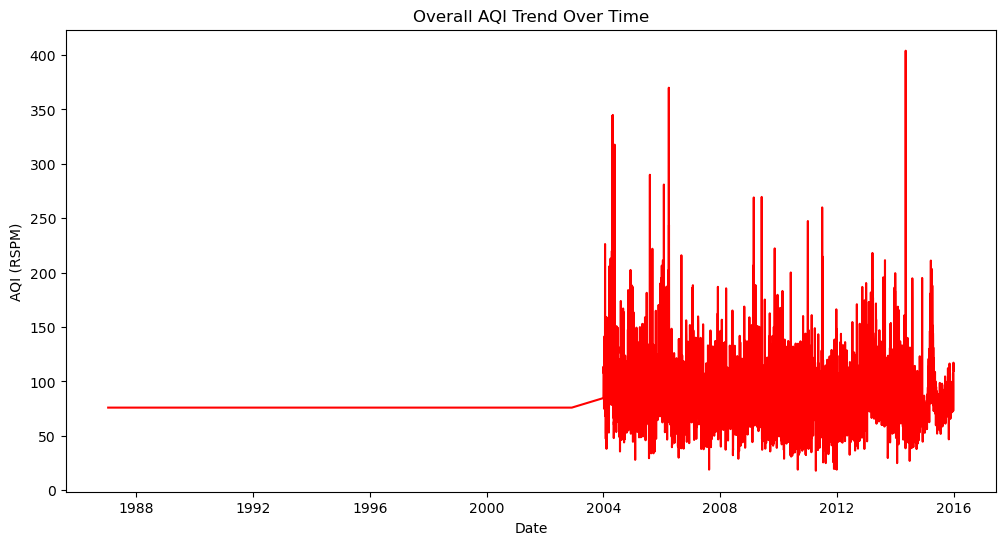

In [25]:
plt.figure(figsize=(12,6))
sns.lineplot(x=daily_data.index, y=daily_data['rspm'], color='red') # RSPM (Respirable Suspended Particulate Matter) 
plt.title("Overall AQI Trend Over Time")
plt.xlabel("Date")
plt.ylabel("AQI (RSPM)")
plt.show()

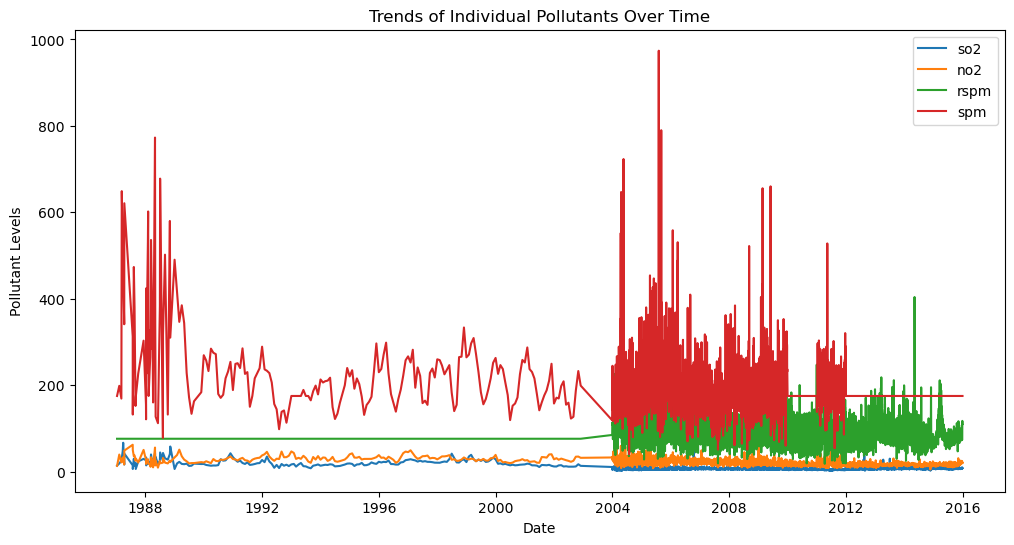

In [26]:
plt.figure(figsize=(12,6))
for col in pollutants:
    sns.lineplot(x=daily_data.index, y=daily_data[col], label=col)
plt.title("Trends of Individual Pollutants Over Time")
plt.xlabel("Date")
plt.ylabel("Pollutant Levels")
plt.legend()
plt.show()

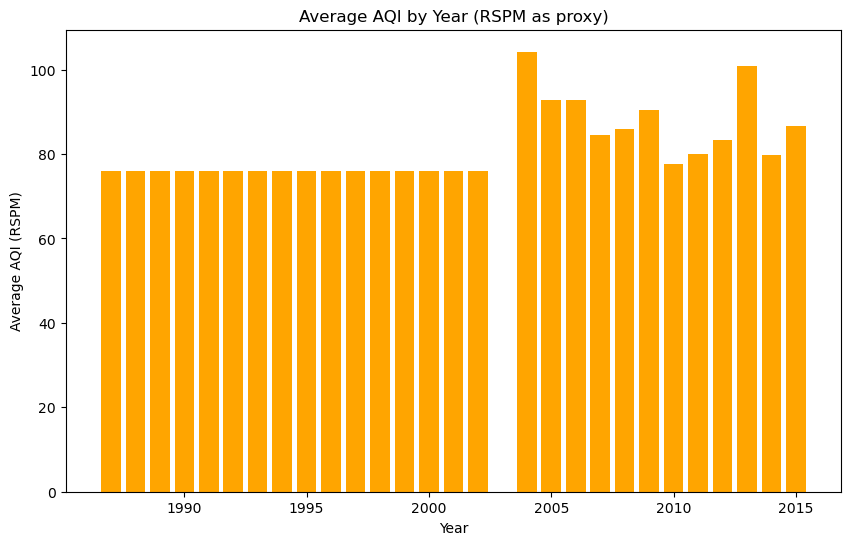

In [27]:
yearly_data = daily_data.resample('Y').mean()
plt.figure(figsize=(10,6))
plt.bar(yearly_data.index.year, yearly_data['rspm'], color='orange')
plt.title("Average AQI by Year (RSPM as proxy)")
plt.xlabel("Year")
plt.ylabel("Average AQI (RSPM)")
plt.show()

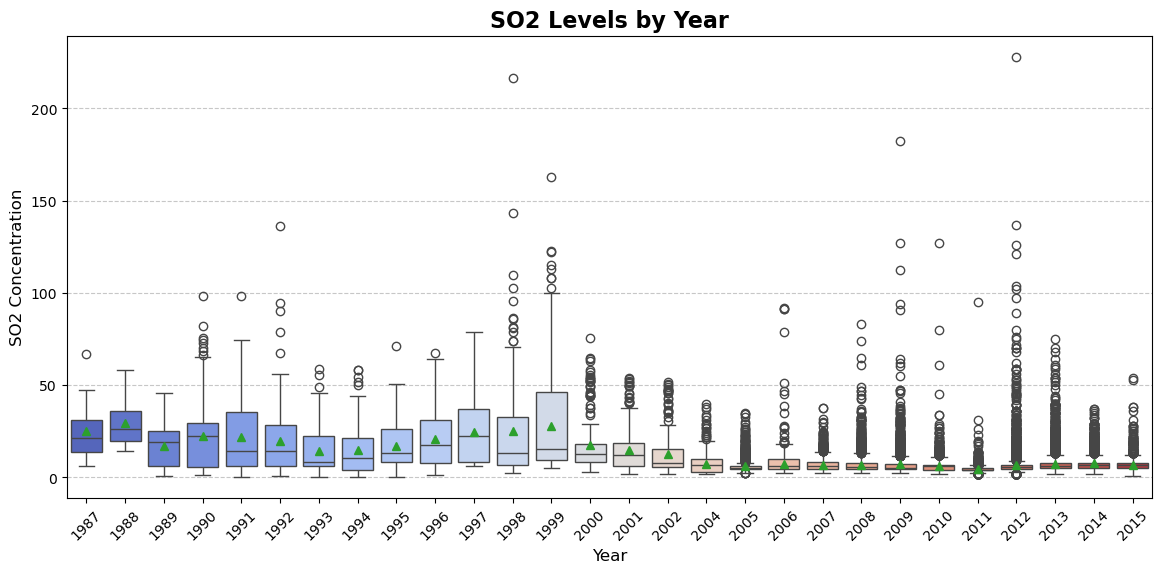

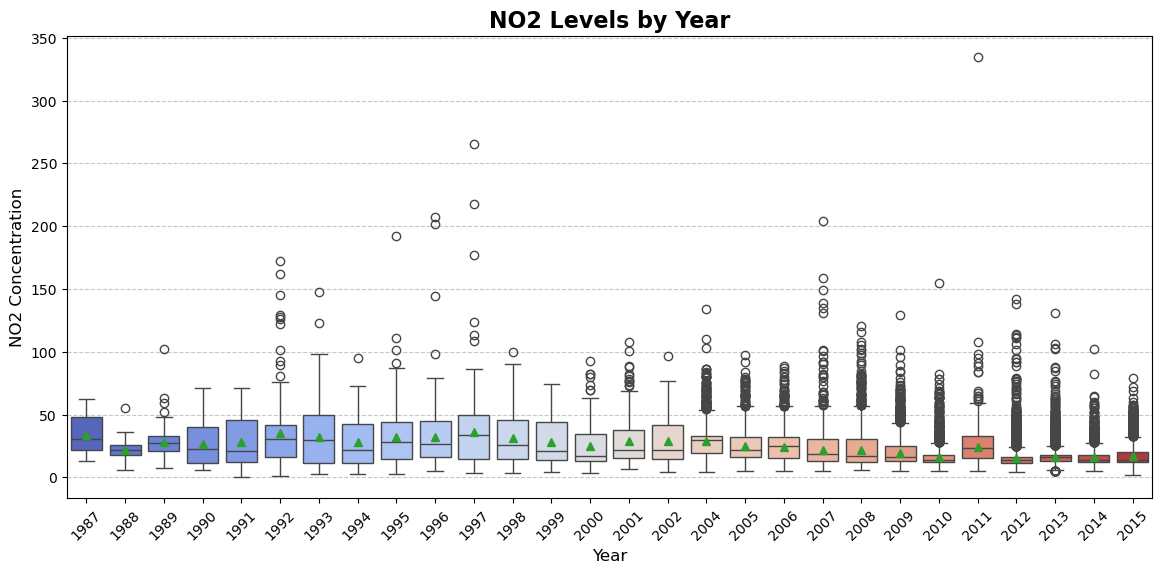

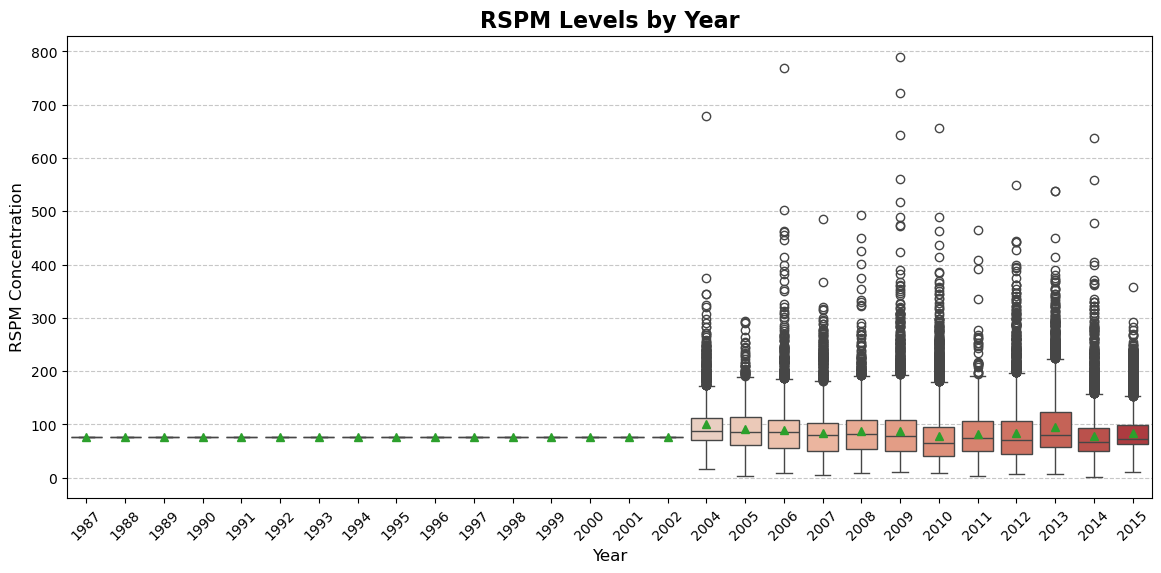

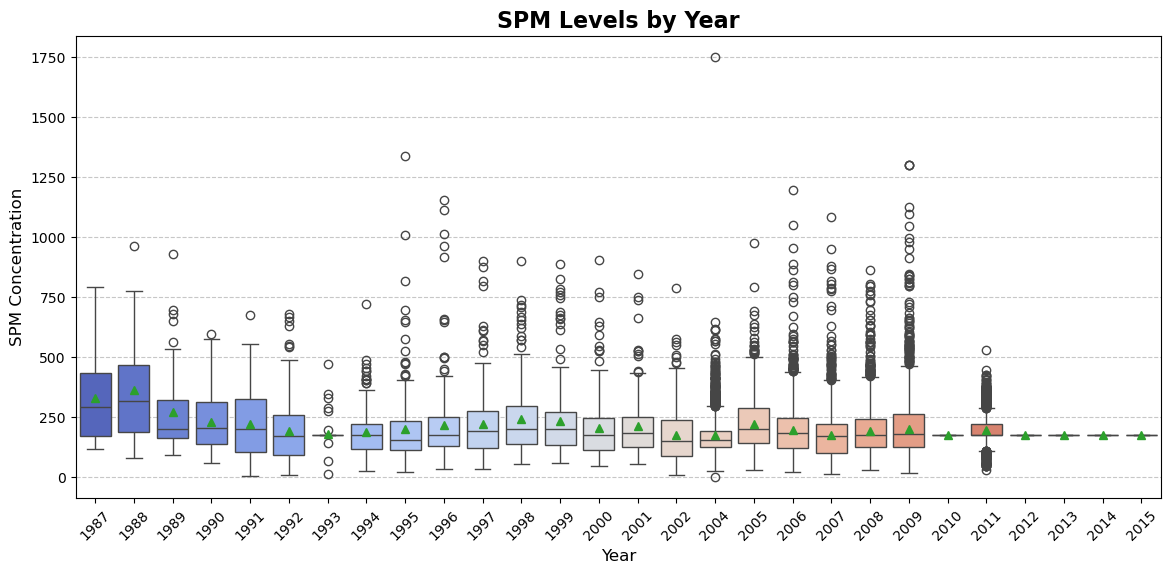

In [28]:
for pollutant in pollutants:
    plt.figure(figsize=(14,6))
    sns.boxplot(
        x='year',
        y=pollutant,
        data=df,
        palette="coolwarm",
        showmeans=True
    )
    plt.title(f'{pollutant.upper()} Levels by Year', fontsize=16, fontweight='bold')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel(f'{pollutant.upper()} Concentration', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

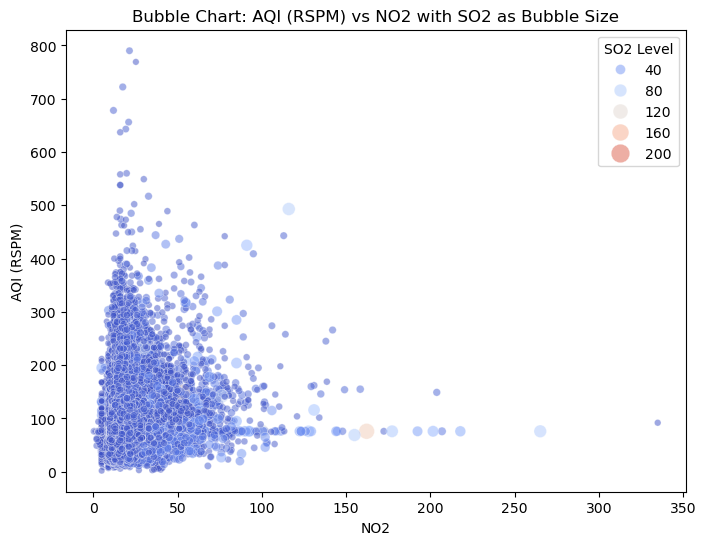

In [29]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['no2'], y=df['rspm'], size=df['so2'], #size - bubble size - s02 conc
                sizes=(20, 200), alpha=0.5, hue=df['so2'], palette="coolwarm")
plt.title("Bubble Chart: AQI (RSPM) vs NO2 with SO2 as Bubble Size")
plt.xlabel("NO2")
plt.ylabel("AQI (RSPM)")
plt.legend(title="SO2 Level")
plt.show()

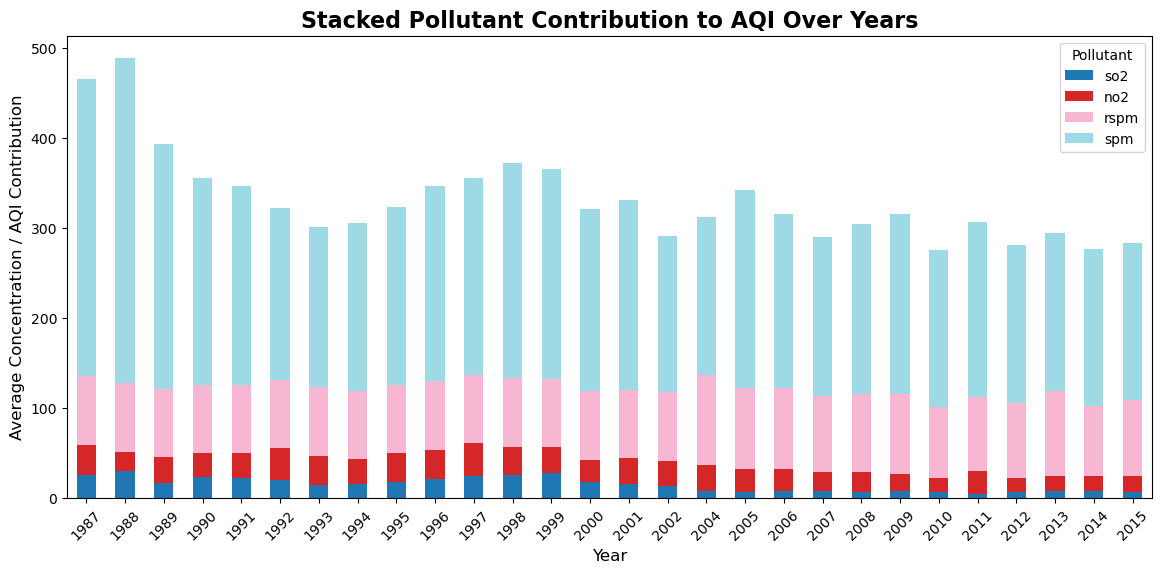

In [30]:
avg_df = df.groupby('year')[pollutants].mean()

# Plot stacked bar
avg_df.plot(kind='bar', stacked=True, figsize=(14,6), colormap='tab20')
plt.title("Stacked Pollutant Contribution to AQI Over Years", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Concentration / AQI Contribution", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Pollutant')
plt.show()